## exploratory data analysis

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style('darkgrid')

In [17]:
df = pd.read_csv('data/zomato_cleaned.csv')

In [18]:
df.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city
0,Jalsa,True,True,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,True,False,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,True,False,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,False,False,3.7,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,False,False,3.8,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41190 entries, 0 to 41189
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41190 non-null  object 
 1   online_order  41190 non-null  bool   
 2   book_table    41190 non-null  bool   
 3   rate          41190 non-null  float64
 4   votes         41190 non-null  int64  
 5   rest_type     41190 non-null  object 
 6   cuisines      41190 non-null  object 
 7   cost          41190 non-null  float64
 8   type          41190 non-null  object 
 9   city          41190 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 2.6+ MB


## examining how many restaurants have online ordering facility

In [22]:
df['online_order'].value_counts()

online_order
True     27046
False    14144
Name: count, dtype: int64

<Axes: title={'center': 'restaurants accepting online orders'}>

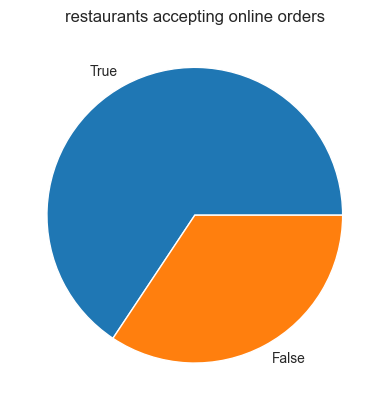

In [23]:
df['online_order'].value_counts().plot(kind='pie', title='restaurants accepting online orders', ylabel='')

## examining how many restaurants have online table booking facility

In [24]:
df['book_table'].value_counts()

book_table
False    34915
True      6275
Name: count, dtype: int64

<Axes: title={'center': 'restaurants with table booking'}>

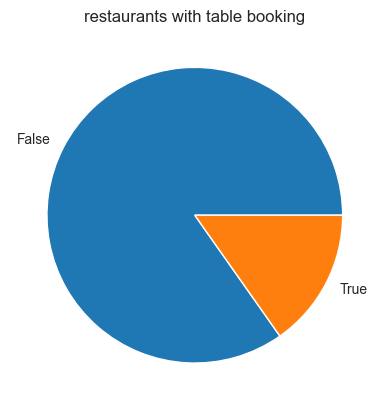

In [27]:
df['book_table'].value_counts().plot(kind='pie', title='restaurants with table booking', ylabel='')

## examining how the ratings are distributed

<Axes: xlabel='rate', ylabel='rating_count'>

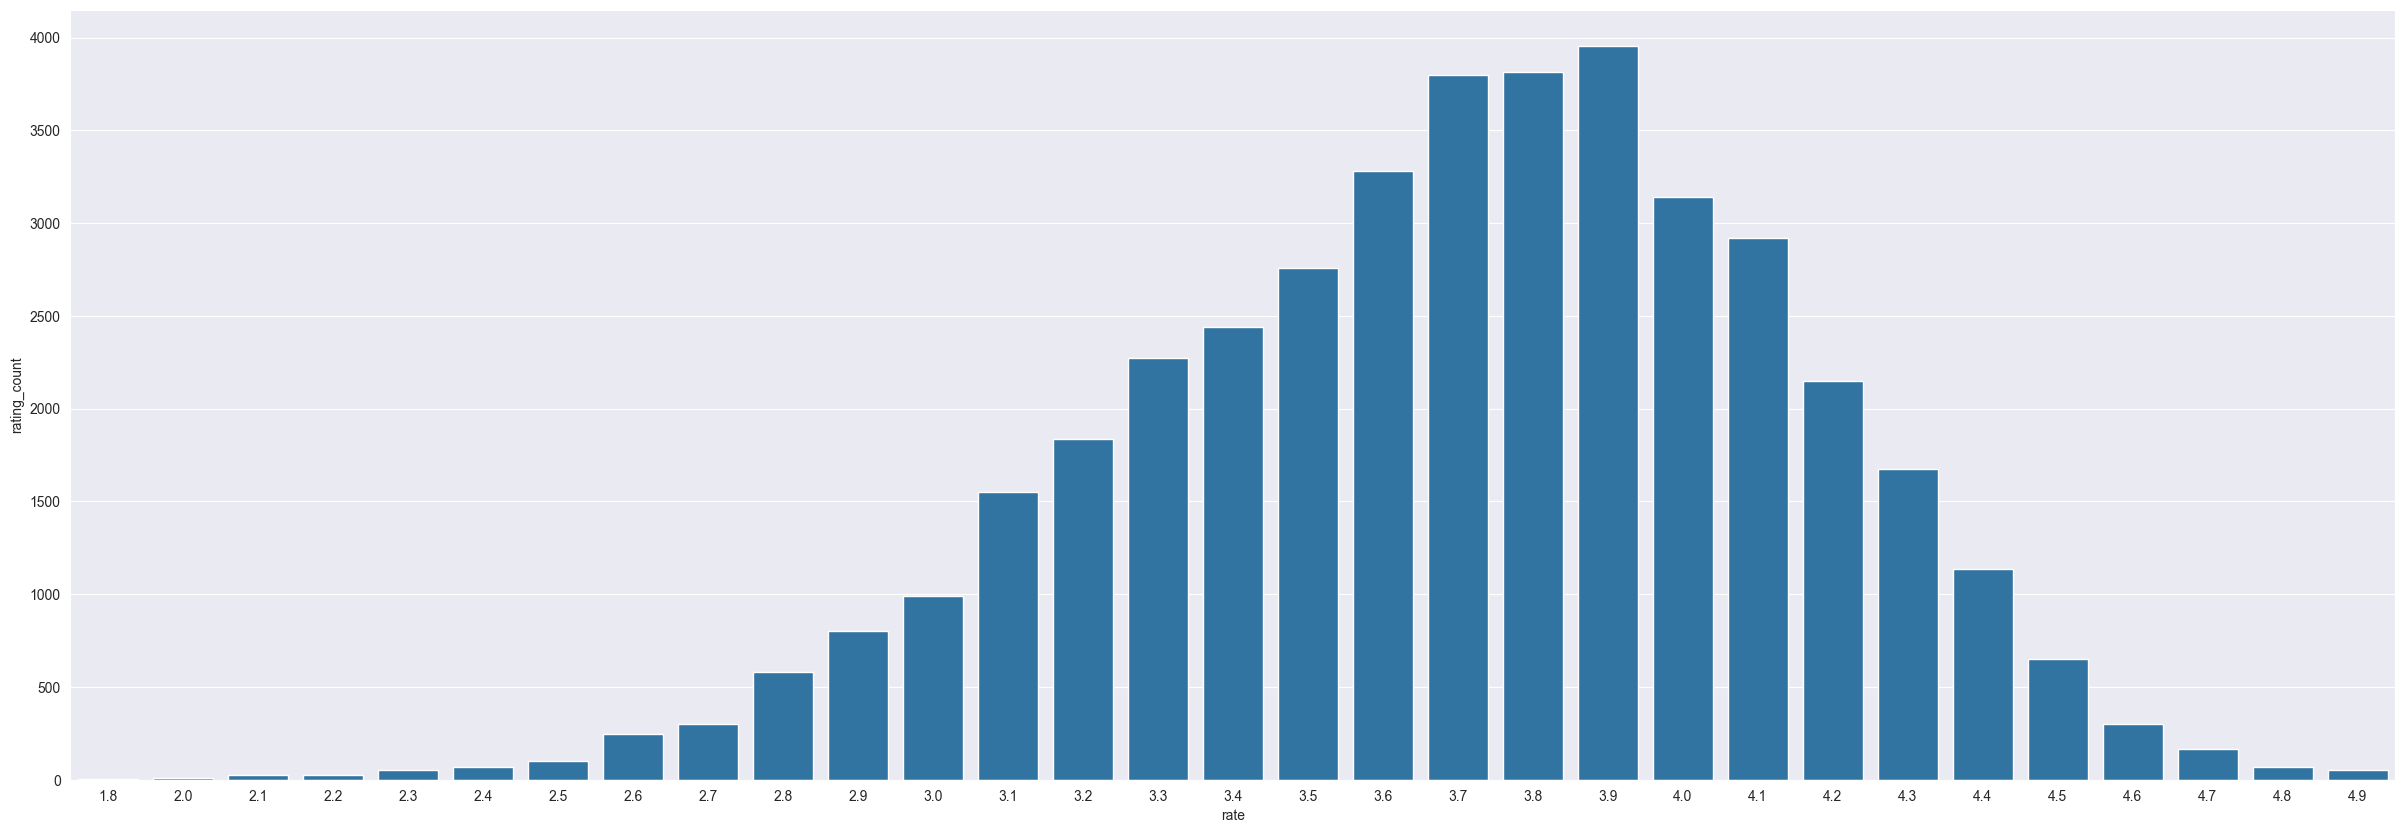

In [49]:
plt.figure(figsize=(30,10))
rating = df.groupby(df['rate']).size().reset_index().rename(columns={0:'rating_count'})
sns.barplot(x='rate', y='rating_count', data=rating)

in this normal distribution, the mean for the ratings is at around 3.8, with very few restaurents having a low rating, that means the restaruents quality as a whole is good.

## is there any corelation between cost and ratings?


<Axes: >

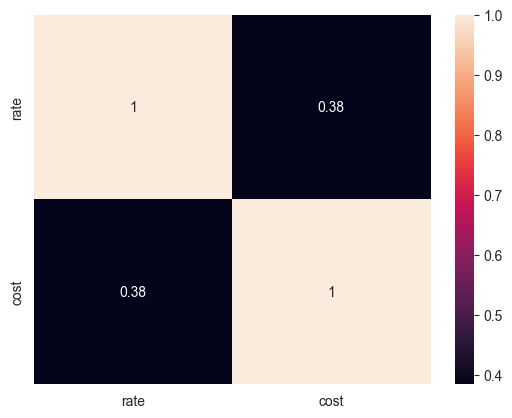

In [54]:
correlation = df[['rate', 'cost']].corr()
sns.heatmap(correlation, annot=True)

so there is a positive corelation of around 40% between cost and ratings, which is significant.

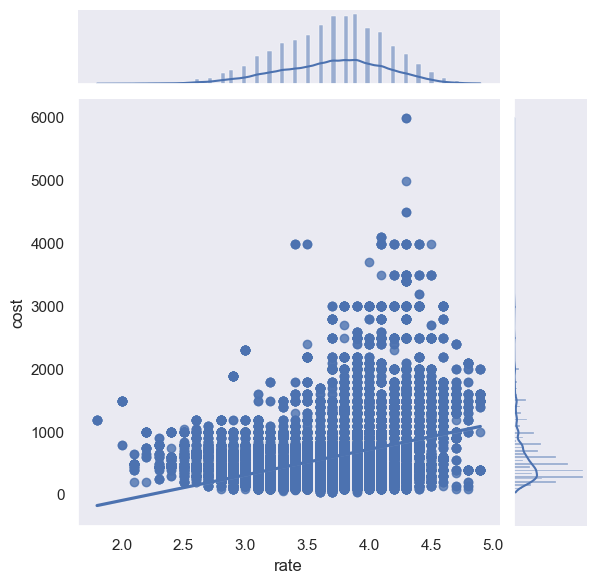

In [59]:
sns.jointplot(x='rate', y='cost', data=df, kind='reg')

the same correlation between ratings and cost visualised as a distplot.

## location vs rating

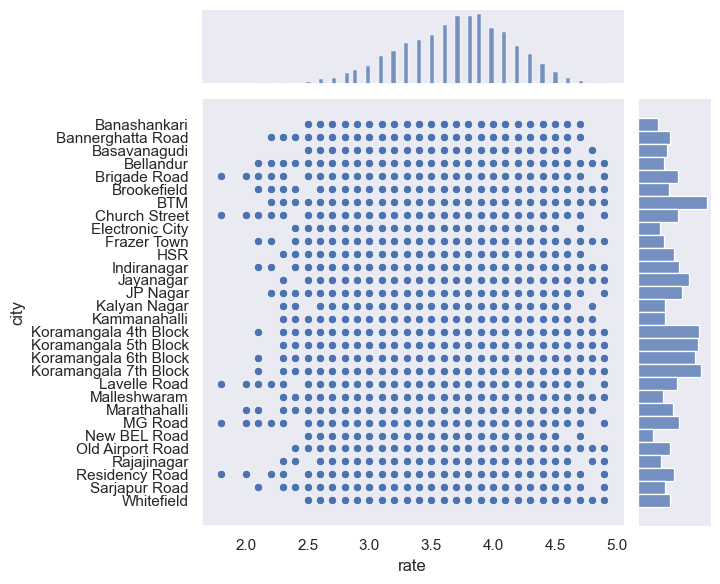

In [61]:
sns.jointplot(x='rate', y='city', data=df, kind='scatter')

a scatter plot for ratings area wise

## location wise average of ratings

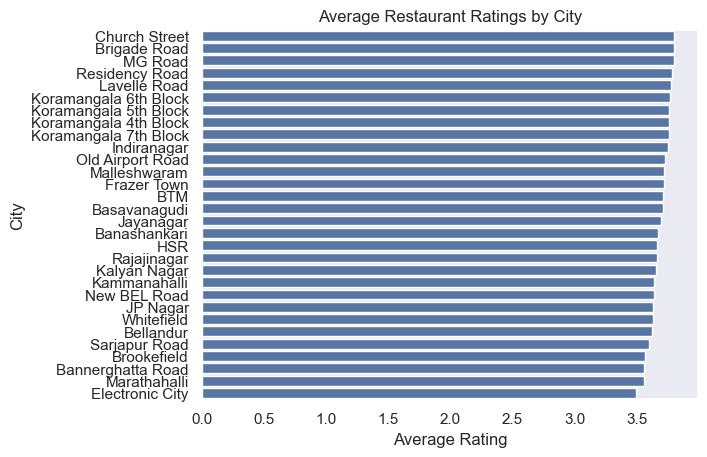

City-wise Average Ratings:
                     city      rate
7           Church Street  3.801338
5            Brigade Road  3.800742
21                MG Road  3.799536
27         Residency Road  3.778720
20           Lavelle Road  3.774948
18  Koramangala 6th Block  3.763679
17  Koramangala 5th Block  3.760703
16  Koramangala 4th Block  3.760630
19  Koramangala 7th Block  3.759407
11            Indiranagar  3.748503
25       Old Airport Road  3.723313
22           Malleshwaram  3.716068
9             Frazer Town  3.715635
0                     BTM  3.708495
3            Basavanagudi  3.707276
13              Jayanagar  3.695246
1            Banashankari  3.667263
10                    HSR  3.663732
26            Rajajinagar  3.658028
14           Kalyan Nagar  3.651769
15           Kammanahalli  3.641003
24           New BEL Road  3.636380
12               JP Nagar  3.631618
29             Whitefield  3.629642
4               Bellandur  3.625630
28          Sarjapur Road  3.599705
6

In [72]:
city_ratings = df.groupby('city')['rate'].mean().reset_index().sort_values(by='rate', ascending=False)

sns.barplot(y=city_ratings.city, x=city_ratings.rate, data=city_ratings)
plt.title('Average Restaurant Ratings by City')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()

print("City-wise Average Ratings:")
print(city_ratings)

from this it is evident that restaurents in areas like chruch street, brigade road, mg road, residency road have a better reception and tend to have better ratings

## favourite cusines based on ratings

In [73]:
fav_cusines = df.groupby('cuisines')['rate'].mean().reset_index().sort_values(by='rate', ascending=False)

In [76]:
fav_cusines.head(10)

,cuisines,rate
1001,"Continental, North Indian, Italian, South Indi...",4.900000
1274,"Healthy Food, Salad, Mediterranean",4.900000
172,"Asian, Chinese, Thai, Momos",4.900000
989,"Continental, North Indian, Chinese, European, ...",4.800000
192,"Asian, Mediterranean, North Indian, BBQ",4.800000
1816,"North Indian, European, Mediterranean, BBQ",4.800000
1087,"European, Mediterranean, North Indian, BBQ",4.789474
48,"American, Tex-Mex, Burger, BBQ, Mexican",4.750000
165,"Asian, Burmese",4.700000
219,"BBQ, North Indian, Continental, Chinese",4.700000


an understanding of favourite dishes based on ratings

In [77]:
type_cost = df.groupby('type')['cost'].mean().reset_index().sort_values(by='cost', ascending=False)

In [78]:
type_cost

,type,cost
5,Drinks & nightlife,1454.190751
6,Pubs and bars,1336.031746
0,Buffet,1316.548463
4,Dine-out,655.081851
1,Cafes,646.426208
2,Delivery,495.254631
3,Desserts,409.114064


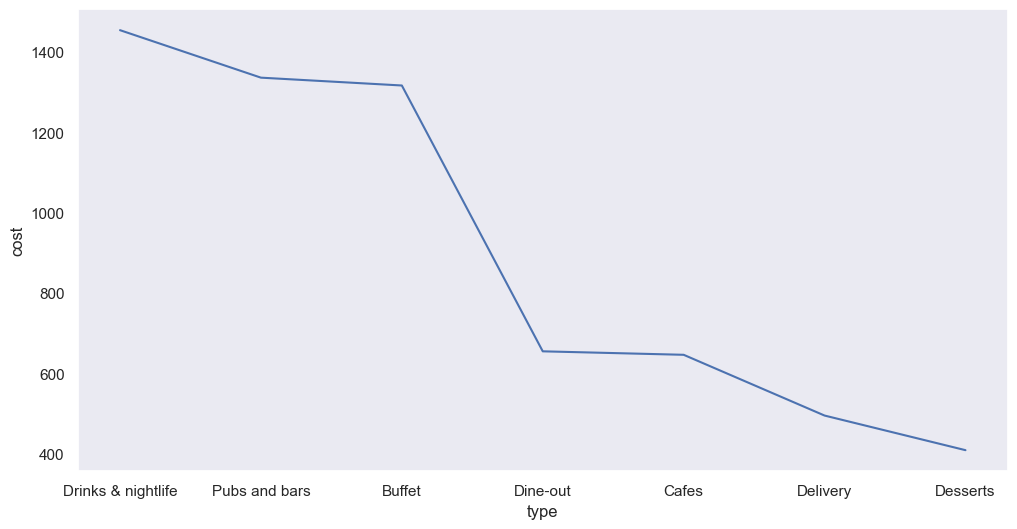

In [92]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='type', y='cost', data=type_cost)
plt.show()

understanding of which type of cusines cost how much, drinks and night life cost the most while desserts cost the least

In [94]:
online_order_rate = df.groupby('online_order')['rate'].mean().reset_index().sort_values(by='rate', ascending=False)

<Axes: xlabel='online_order', ylabel='rate'>

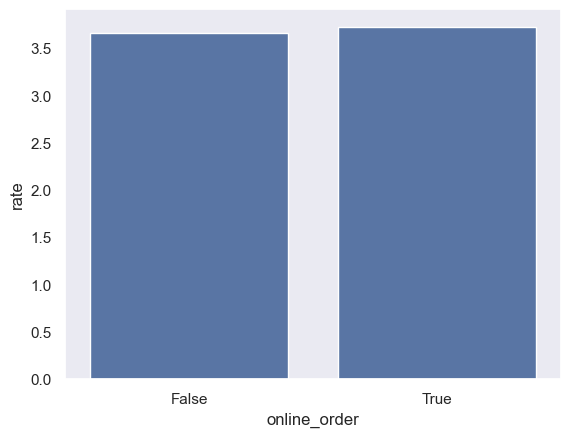

In [95]:
sns.barplot(x='online_order', y='rate', data=online_order_rate)

from this it is evident that online order availablity or lack there of has no significant impact on it's ratings

## Inferences
from this exploratory data analysis we can make a few inferences such as
- resturatents that cost less tend to have better ratings.
- location of the restuarent does give it an edge in if wheather it will sucesssed.
- continental, noth indian and south indian cusines have better ratings.
- desserts cost the least while drinks cost the highest.